In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('cardekho.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


# Missing Values

In [3]:
data.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [5]:
data.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [6]:
print(data['seats'].mode()[0])
print(data['max_power'].mode()[0])
print(data['engine'].mode()[0])
print(data['mileage(km/ltr/kg)'].mode())

5.0
74
1248.0
0    18.9
Name: mileage(km/ltr/kg), dtype: float64


In [7]:
# data['seats'].fillna((data['seats'].mode()[0]), inplace=True)
data.fillna({
    'seats':data['seats'].mode()[0],
    'max_power':data['max_power'].mode()[0],
    'engine':data['engine'].mode()[0],
    'mileage(km/ltr/kg)':np.mean(data['mileage(km/ltr/kg)'])
}, inplace=True)

In [8]:
data.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

# Encoding

In [9]:
print(data['name'].unique())
print(data['name'].nunique())
print(data['fuel'].unique())
print(data['fuel'].nunique())
print(data['seller_type'].unique())
print(data['seller_type'].nunique())
print(data['transmission'].unique())
print(data['transmission'].nunique())
print(data['owner'].unique())
print(data['owner'].nunique())


['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
2058
['Diesel' 'Petrol' 'LPG' 'CNG']
4
['Individual' 'Dealer' 'Trustmark Dealer']
3
['Manual' 'Automatic']
2
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
5


In [10]:
data['brand'] = data['name'].str.split(' ').str[0]

In [11]:
print(data['brand'].unique())
print(data['brand'].nunique())

['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']
32


In [12]:
data = pd.get_dummies(data=data, columns=['fuel', 'seller_type', 'transmission', 'owner', 'brand'], dtype=int)

In [13]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)',
       'engine', 'max_power', 'seats', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'brand_Ambassador',
       'brand_Ashok', 'brand_Audi', 'brand_BMW', 'brand_Chevrolet',
       'brand_Daewoo', 'brand_Datsun', 'brand_Fiat', 'brand_Force',
       'brand_Ford', 'brand_Honda', 'brand_Hyundai', 'brand_Isuzu',
       'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land', 'brand_Lexus',
       'brand_MG', 'brand_Mahindra', 'brand_Maruti', 'brand_Mercedes-Benz',
       'brand_Mitsubishi', 'brand_Nissan', 'brand_Opel', 'brand_Peugeot',
       'brand_Renault', 'brand_Skoda', 'brand_Tata', 'brand_Toyota',
       'brand_Volkswagen', '

In [14]:
data.drop(columns=['name'], inplace=True)
data.columns = data.columns.str.replace('fuel_', '', regex=False)
data.columns = data.columns.str.replace('brand_', '', regex=False)
data.columns = data.columns.str.replace('transmission_', '', regex=False)
data.columns = data.columns.str.replace('seller_type_', '', regex=False)
data.columns = data.columns.str.replace('owner_', '', regex=False)
data.columns = data.columns.str.replace(' Owner', '', regex=False)
data.columns = data.columns.str.replace(' Drive Car', '', regex=False)
data.columns = data.columns.str.replace(' Dealer', '', regex=False)
data.columns = data.columns.str.replace(' & Above', '+', regex=False)

In [15]:
data.head()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,CNG,Diesel,LPG,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2014,450000,145500,23.40,1248.0,74,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,370000,120000,21.14,1498.0,103.52,5.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2006,158000,140000,17.70,1497.0,78,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,225000,127000,23.00,1396.0,90,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2007,130000,120000,16.10,1298.0,88.2,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Outliers

In [16]:
data.shape

(8128, 53)

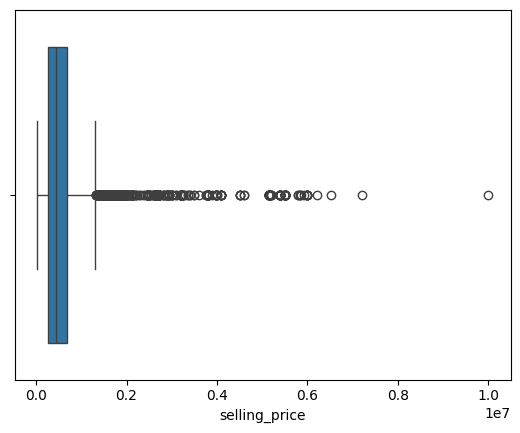

In [17]:
sns.boxplot(data=data, x='selling_price')
plt.show()

In [18]:
q1 = data['selling_price'].quantile(0.25)
q3 = data['selling_price'].quantile(0.75)
iqr = q3 - q1

In [19]:
low = q1 - 1.5*(iqr)
high = q3 + 1/5*(iqr)

In [20]:
data = data[(data['selling_price'] > low) & (data['selling_price'] <= high)]

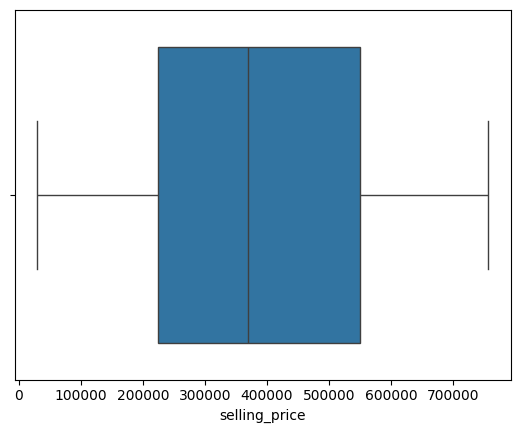

In [21]:
sns.boxplot(data=data, x='selling_price')
plt.show() 

In [22]:
data.shape

(6629, 53)

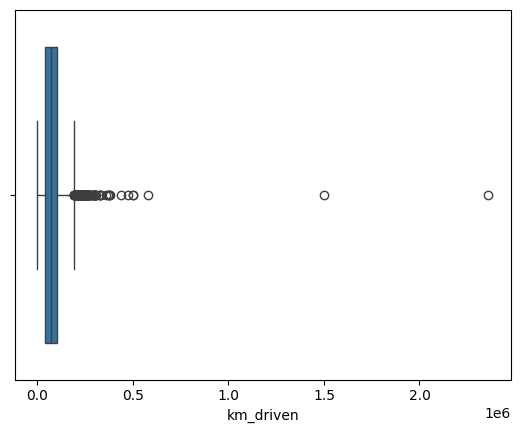

In [23]:
sns.boxplot(data=data, x='km_driven')
plt.show()

In [24]:
q1 = data['km_driven'].quantile(0.25)
q3 = data['km_driven'].quantile(0.75)
iqr = q3 - q1

In [25]:
low = q1 - 1.5*(iqr)
high = q3 + 1/5*(iqr)

In [26]:
data = data[(data['km_driven'] > low) & (data['km_driven'] <= high)]

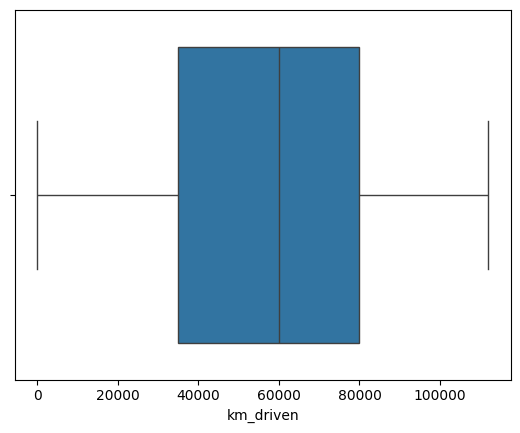

In [27]:
sns.boxplot(data=data, x='km_driven')
plt.show()

In [28]:
data.shape

(5471, 53)

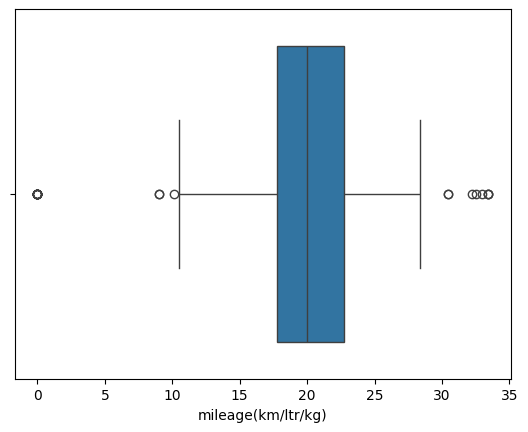

In [29]:
sns.boxplot(data=data, x='mileage(km/ltr/kg)')
plt.show()

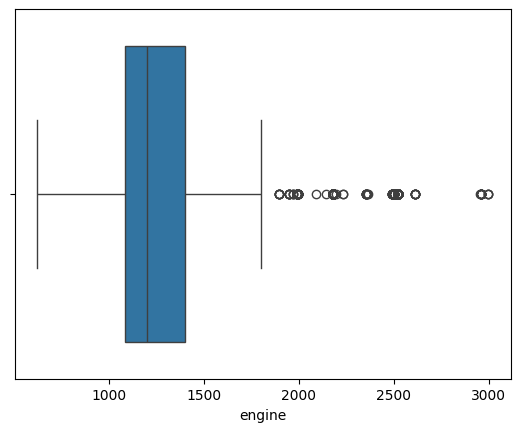

In [30]:
sns.boxplot(data=data, x='engine')
plt.show()


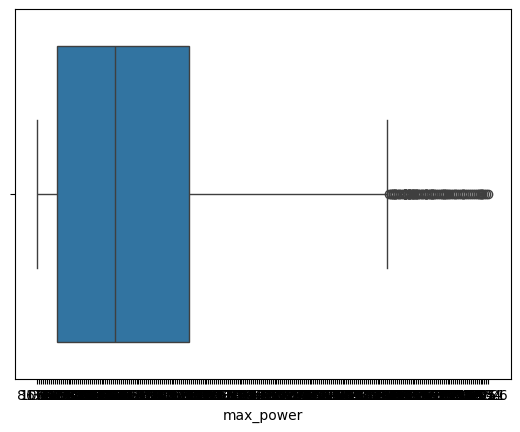

In [31]:
sns.boxplot(data=data, x='max_power')
plt.show()

# Data Type

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5471 entries, 5 to 8127
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                5471 non-null   int64  
 1   selling_price       5471 non-null   int64  
 2   km_driven           5471 non-null   int64  
 3   mileage(km/ltr/kg)  5471 non-null   float64
 4   engine              5471 non-null   float64
 5   max_power           5471 non-null   object 
 6   seats               5471 non-null   float64
 7   CNG                 5471 non-null   int64  
 8   Diesel              5471 non-null   int64  
 9   LPG                 5471 non-null   int64  
 10  Petrol              5471 non-null   int64  
 11  Dealer              5471 non-null   int64  
 12  Individual          5471 non-null   int64  
 13  Trustmark           5471 non-null   int64  
 14  Automatic           5471 non-null   int64  
 15  Manual              5471 non-null   int64  
 16  First      

In [33]:
data['max_power'] = data['max_power'].replace(' ', data['max_power'].mode()[0])

# Train Test Split

In [34]:
x = data.drop(columns=['selling_price'])
y = data['selling_price']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Regression Models
## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
lr.score(x_test, y_test)

0.7864232756330944

In [41]:
lr.score(x_train, y_train)

0.7722662027014104

## RF 

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rfr = RandomForestRegressor(n_estimators=200, criterion='friedman_mse', max_depth=10)

In [44]:
rfr.fit(x_train, y_train)

,n_estimators,200
,criterion,'friedman_mse'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
rfr.score(x_test, y_test)

0.8958231429508511

In [46]:
rfr.score(x_train, y_train)

0.9383420711210599

In [47]:
rfr.score(x_train, y_train) - rfr.score(x_test, y_test)

0.04251892817020886

# DT

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
dt = DecisionTreeRegressor()

In [50]:
dt.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [51]:
dt.score(x_test, y_test)

0.8176465567769176

In [52]:
dt.score(x_train, y_train)

0.9958558737861137

# Cross Validation 

In [53]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

In [54]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(DecisionTreeRegressor(), x, y, cv=cv)

array([0.82062314, 0.83907467, 0.81404493, 0.82012748, 0.82251315])

# Grid Search CV
## RF

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
df = {
    'criterion':['friedman_mse'],
    'max_depth':[i for i in range(5,15)],
    'n_estimators': [200],
}

In [57]:
gs = GridSearchCV(DecisionTreeRegressor(), param_grid=df, cv=cv)

In [58]:
# gs.fit(x_train, y_train)

In [59]:
# gs.score(x_test, y_test)

In [60]:
# gs.score(x_train, y_train)

# Hyperparameter Tuning Function 

In [61]:
def best_algo(x, y):
    algo= {
        'DT': {
            'model': DecisionTreeRegressor(),
            'params': {
                    'criterion':['squared_error', 'friedman_mse'],
                    'splitter':['best', 'random'],
                    'max_depth': [i for i in range(5,15)]
            }
        },
        'RF': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'n_estimators': [100,200,300],
                'max_depth': [i for i in range(5,15)]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algo.items():
        gs = GridSearchCV(estimator=config['model'], param_grid=config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append(
            {
                'model': algo_name,
                'best_score': gs.best_score_,
                'best_params': gs.best_params_
            }
        )
    pd.set_option('display.max_colwidth', None)
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [62]:
# best_algo(x,y)

In [63]:
x.head()

,year,km_driven,mileage(km/ltr/kg),engine,max_power,seats,CNG,Diesel,LPG,Petrol,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
5,2017,45000,20.14,1197.0,81.86,5.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,2001,5000,16.10,796.0,37,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,2011,90000,23.59,1364.0,67.1,5.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10,2014,68000,19.01,1461.0,108.45,5.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
11,2005,100000,17.30,993.0,60,5.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [64]:
np.where(data.columns == 'Renault')[0][0]

np.int64(47)

In [65]:
np.zeros(len(x.columns))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [66]:
def predict_price(brand, fuel, transmission, owner, seller, year, km, mileage, engine_cc, max_bhp, seats):
    brand_index = np.where(x.columns==brand)[0][0]
    fuel_index = np.where(x.columns==fuel)[0][0]
    transmission_index = np.where(x.columns==transmission)[0][0]
    owner_index = np.where(x.columns==owner)[0][0]
    seller_index = np.where(x.columns==seller)[0][0]

    a = np.zeros(len(x.columns))
    a[0] = year
    a[1] = km 
    a[2] = mileage
    a[3] = engine_cc
    a[4] = max_bhp
    a[5] = seats

    if a[brand_index] >= 0:
        a[brand_index] = 1
    if a[fuel_index] >= 0:
        a[fuel_index] = 1
    if a[transmission_index] >= 0:
        a[transmission_index] = 1
    if a[owner_index] >= 0:
        a[owner_index] = 1
    if a[seller_index]  >= 0:
        a[seller_index] = 1

    return rfr.predict([a])[0]

In [67]:
x.columns

Index(['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'CNG', 'Diesel', 'LPG', 'Petrol', 'Dealer', 'Individual',
       'Trustmark', 'Automatic', 'Manual', 'First', 'Fourth+', 'Second',
       'Test', 'Third', 'Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet',
       'Daewoo', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai',
       'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')

In [68]:
predict_price(brand='Mitsubishi', fuel='Diesel', transmission='Manual', owner='Second', seller='Dealer' ,year=2017, km=45000, mileage=60, engine_cc=1300, max_bhp=60, seats=5)

c:\Users\iamha\anaconda3\envs\tf-jupyter\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(425941.4642621106)

In [69]:
predict_price(brand='Renault', fuel='Petrol', transmission='Automatic', owner='First', seller='Dealer' ,year=2019, km=45000, mileage=60, engine_cc=1300, max_bhp=60, seats=5)

c:\Users\iamha\anaconda3\envs\tf-jupyter\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(444478.84029722406)

In [70]:
import pickle 

In [71]:
with open('Old_Car.pickle', 'wb') as f:
    pickle.dump(rfr, f)

In [72]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open('Columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [7]:
import numpy as np 
import pandas as pd
print(np.__version__)
print(pd.__version__)
import sklearn 
print(sklearn.__version__)
import matplotlib
print(matplotlib.__version__)
import seaborn 
print(seaborn.__version__)
import mlxtend
print(mlxtend.__version__)

2.1.3
2.3.0
1.7.0
3.10.3
0.13.2
0.23.4
